## IsolationForest를 활용하여 이상탐지 모델 개발
활용 데이터: 건강검진 데이터

데이터 출처: https://www.kaggle.com/drateendrajha/health-screening-data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
from sklearn.ensemble import IsolationForest

In [78]:
data = pd.read_csv('C:/Users/서유진/Desktop/Health Screening Data.csv')
data.tail()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup
69955,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.9,Over Weight,40-60
69956,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.5,Obese,>60
69957,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.4,Obese,40-60
69958,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.1,Over Weight,>60
69959,69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0,56,24.9,Normal,40-60


In [79]:
lst = []
for age in data['age']:
    if age in range(14026,14672):
        lst.append('age01')
    elif age in range(14672,15318):
        lst.append('age02')
    elif age in range(15318,15964):
        lst.append('age03')
    elif age in range(15964,16609):
        lst.append('age04')
    elif age in range(16609,17255):
        lst.append('age05')
    elif age in range(17255,17901):
        lst.append('age06')
    elif age in range(17901,18547):
        lst.append('age07')
    elif age in range(18547,19192):
        lst.append('age08')
    elif age in range(19192,19838):
        lst.append('age09')
    elif age in range(19838,20484):
        lst.append('age10')
    elif age in range(20484,21130):
        lst.append('age11')
    elif age in range(21130,21775):
        lst.append('age12')
    elif age in range(21775,22421):
        lst.append('age13')
    elif age in range(22421,23067):
        lst.append('age14')
    elif age in range(23067,23713):
        lst.append('age15')
    else: lst.append('age16')
        
data['age'] = lst

In [80]:
lst2 = []
for bmi in data['BMICat']:
    if bmi=='Normal':
        lst2.append(1)
    elif bmi=='Over Weight':
        lst2.append(2)
    elif bmi=='Obese':
        lst2.append(3)
    else:
        lst2.append(4)
        
data['BMICat'] = lst2

In [81]:
del data['AgeGroup']
del data['Unnamed: 0']
del data['id']

In [82]:
data.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat
69955,age09,2,168,76.0,120,80,1,1,1,0,1,0,52,26.9,2
69956,age14,1,158,126.0,140,90,2,2,0,0,1,1,61,50.5,3
69957,age08,2,183,105.0,180,90,3,1,0,1,0,1,52,31.4,3
69958,age14,1,163,72.0,135,80,1,2,0,0,0,1,61,27.1,2
69959,age11,1,170,72.0,120,80,2,1,0,0,1,0,56,24.9,1


In [83]:
df = data.copy()

In [84]:
df['age'].value_counts()

age09    6589
age07    6577
age08    6302
age10    6110
age13    5778
age12    5616
age11    5594
age15    4888
age14    4525
age06    3918
age05    3272
age04    2968
age02    2754
age03    2632
age01    2432
age16       5
Name: age, dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder
age_encode = LabelEncoder()
data['age'] = age_encode.fit_transform(data['age'])
data.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat
69955,8,2,168,76.0,120,80,1,1,1,0,1,0,52,26.9,2
69956,13,1,158,126.0,140,90,2,2,0,0,1,1,61,50.5,3
69957,7,2,183,105.0,180,90,3,1,0,1,0,1,52,31.4,3
69958,13,1,163,72.0,135,80,1,2,0,0,0,1,61,27.1,2
69959,10,1,170,72.0,120,80,2,1,0,0,1,0,56,24.9,1


In [87]:
model = IsolationForest(n_estimators=100, max_samples='auto', n_jobs=-1, max_features=2, contamination=0.01)
model.fit(data.to_numpy())

IsolationForest(contamination=0.01, max_features=2, n_jobs=-1)

In [88]:
score = model.decision_function(data.to_numpy())
anomaly = model.predict(data.to_numpy())
df['scores'] = score
df['anomaly'] = anomaly
anomaly_data = df.loc[df['anomaly']==-1]
anomaly_data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,scores,anomaly
107,age01,2,164,48.0,110,70,1,2,1,1,1,1,39,17.8,4,-0.080405,-1
108,age03,2,174,54.0,130,80,2,2,0,0,1,1,42,17.8,4,-0.023039,-1
228,age06,2,183,98.0,160,1100,1,2,1,0,1,1,47,29.3,2,-0.021508,-1
329,age15,1,176,63.0,160,1000,2,2,0,0,0,1,64,20.3,1,-0.010380,-1
372,age02,2,172,71.0,160,120,3,3,1,1,0,1,41,24.0,1,-0.030662,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69811,age02,1,150,42.0,90,60,1,1,0,0,1,0,40,18.7,1,-0.002619,-1
69833,age09,2,188,108.0,130,80,2,2,0,1,0,1,54,30.6,3,-0.010847,-1
69875,age13,2,178,102.0,150,100,1,2,0,1,0,1,59,32.2,3,-0.010132,-1
69879,age06,1,159,45.0,110,70,2,2,0,0,1,0,47,17.8,4,-0.011701,-1


In [119]:
anomaly_data['age'].value_counts()

age01    87
age02    61
age14    60
age15    58
age06    56
age05    51
age07    50
age03    49
age08    42
age11    34
age12    32
age09    31
age13    31
age04    30
age10    28
Name: age, dtype: int64

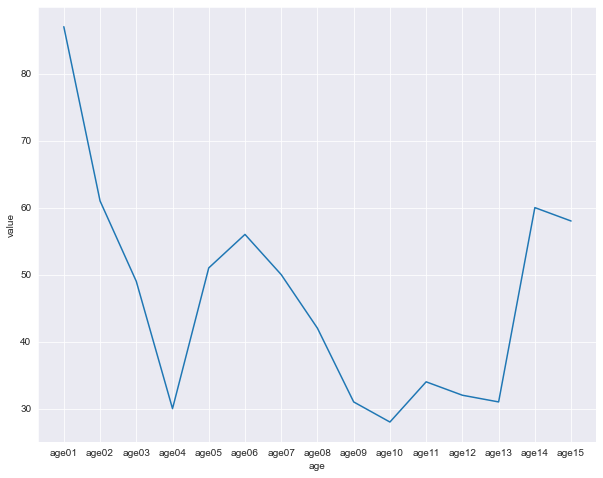

In [121]:
df_new = pd.DataFrame(dict(age=['age01','age02','age03','age04','age05','age06','age07','age08','age09','age10','age11','age12','age13','age14','age15'], 
                           value=[87,61,49,30,51,56,50,42,31,28,34,32,31,60,58]))

plt.figure(figsize=(10,8))
ax = sns.lineplot(x='age',y='value',data=df_new)

age01 그룹에서 비정상(건강하지 못한 경우) 값이 가장 많이 관측되었고, age02, age14가 비슷한 수치로 그 뒤를 이었다.
이 연령 그룹대의 사람들에게 주기적인 건강검진 및 건강한 식습관과 운동을 권할 필요성이 보인다.

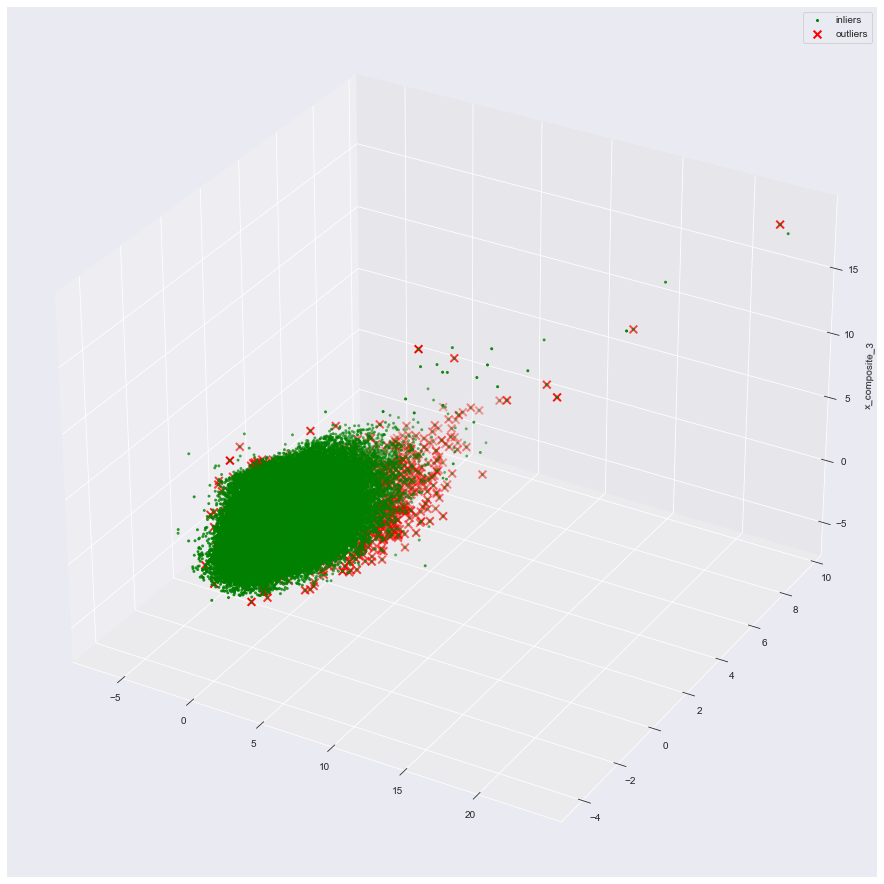

In [115]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

outlier_index = list(anomaly_data.index)

pca = PCA(n_components=3)
scaler = StandardScaler()
X = scaler.fit_transform(data.to_numpy())
X_reduce = pca.fit_transform(X)
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel('x_composite_3')
ax.scatter(X_reduce[:,0], X_reduce[:,1], zs=X_reduce[:,2], s=4, lw=1, label='inliers', c='green')
ax.scatter(X_reduce[outlier_index,0], X_reduce[outlier_index,1], X_reduce[outlier_index, 2], lw=2, s=60, marker='x', c='red', label='outliers')
ax.legend()
plt.show()

특정 인물의 정상/비정상 여부 판단

In [106]:
human01 = {'age':['age11'], 'gender':[2], 'height':[160], 'weight':[58], 'ap_hi':[120], 'ap_lo':[90], 'cholesterol':[2], 'gluc':[2], 'smoke':[0], 'alco':[0], 'active':[1], 'cardio':[0], 'AgeinYr':[56], 'BMI':[22.7], 'BMICat':[1]}
human = pd.DataFrame(human01)
human['age'] = age_encode.fit_transform(human['age'])

In [108]:
model.fit_predict(human.to_numpy(),y=None)

C:\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:473: RuntimeWarning: invalid value encountered in true_divide
  -depths
C:\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:473: RuntimeWarning: invalid value encountered in true_divide
  -depths


array([1])

human01은 정상이다